In [3]:
import tensorflow as tf
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

In [9]:
# Load the images and corresponding speeds
images = []
speed_data = np.load('y_img_res.npy')

# Replace "path/to/images" with the actual path to the directory containing your images
for image_file in os.listdir("img_res/"):
    # Read the image file
    image = cv2.imread(os.path.join("img_res/", image_file))
    # Resize the image to a uniform size
    image = cv2.resize(image, (224, 224))
    # Convert the image to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Normalize the pixel values
    image = image / 255.0
    # Add the image to the list of images
    images.append(image)

In [10]:
# Convert the lists to numpy arrays
images = np.array(images)
speeds = np.array(speed_data)

In [11]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, speeds, test_size=0.2)

In [14]:
# Reshape the data to match the input shape expected by the model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)

In [15]:
# Define the model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/25
25/25 [==============================] - 15s 605ms/step - loss: 970.9049 - val_loss: 434.1055
Epoch 2/25
25/25 [==============================] - 14s 579ms/step - loss: 667.8424 - val_loss: 696.1139
Epoch 3/25
25/25 [==============================] - 14s 575ms/step - loss: 683.0659 - val_loss: 608.7735
Epoch 4/25
25/25 [==============================] - 15s 594ms/step - loss: 588.5754 - val_loss: 544.0447
Epoch 5/25
25/25 [==============================] - 15s 584ms/step - loss: 492.0316 - val_loss: 446.8510
Epoch 6/25
25/25 [==============================] - 14s 581ms/step - loss: 440.2607 - val_loss: 469.6807
Epoch 7/25
25/25 [==============================] - 15s 597ms/step - loss: 456.5724 - val_loss: 441.2182
Epoch 8/25
25/25 [==============================] - 15s 583ms/step - loss: 458.4070 - val_loss: 551.4988
Epoch 9/25
25/25 [==============================] - 14s 562ms/step - loss: 466.5074 - val_loss: 416.3232
Epoch 10/25
25/25 [==============================] - 14

In [23]:
# Save the model
model.save('model_of.h5')

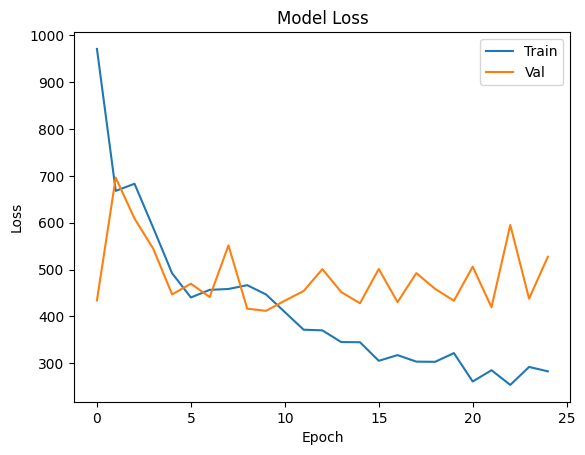

In [24]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [25]:
#run evaluation
model.evaluate(X_val, y_val)

7/7 [==============================] - 1s 85ms/step - loss: 527.2584


527.2583618164062

In [29]:
#run prediction
print(model.predict(X_val))
print(y_val)

7/7 [==============================] - 1s 79ms/step
[[ 26.974598  ]
 [  0.3317172 ]
 [ 69.09178   ]
 [ 56.613216  ]
 [ 59.569706  ]
 [ 25.79292   ]
 [ 29.967173  ]
 [  1.6508896 ]
 [ 11.399361  ]
 [ 16.296917  ]
 [ 38.859123  ]
 [ 20.582989  ]
 [ 61.428864  ]
 [ 57.609467  ]
 [ 44.79018   ]
 [ 59.391975  ]
 [ 16.669266  ]
 [  3.8526251 ]
 [ 47.621105  ]
 [ 60.217716  ]
 [ 27.864204  ]
 [ 42.49161   ]
 [ 72.80059   ]
 [  4.0506806 ]
 [ 65.8999    ]
 [ 70.22789   ]
 [ 75.83808   ]
 [ 45.345562  ]
 [  8.362995  ]
 [ 55.65648   ]
 [ 81.20438   ]
 [ 41.689648  ]
 [ 16.379534  ]
 [ 37.890247  ]
 [ 61.260784  ]
 [ 67.85957   ]
 [ 52.96059   ]
 [ 47.14599   ]
 [ 50.266846  ]
 [ 54.05894   ]
 [  6.7390013 ]
 [ 30.10103   ]
 [ 18.18527   ]
 [ 48.35024   ]
 [ 32.372143  ]
 [ 40.38712   ]
 [ 46.358692  ]
 [ 90.76167   ]
 [ 49.911583  ]
 [ 25.111443  ]
 [ 40.204037  ]
 [ 66.92878   ]
 [ 46.41177   ]
 [ 43.630173  ]
 [ 36.389828  ]
 [ 53.601597  ]
 [ 20.514696  ]
 [ 87.02995   ]
 [ 20.693832  ]
 [ 6

In [33]:
diff_arr = []
for i in range(len(y_val)):
    # print("Predicted: ", model.predict(X_val[i].reshape(1, 224, 224, 1)), "Actual: ", y_val[i])
    diff = abs(model.predict(X_val[i].reshape(1, 224, 224, 1)) - y_val[i])
    diff_arr.append(diff)
    print("Difference: ", diff)
print("average difference: " + str(sum(diff_arr)/len(diff_arr)) + " km/h")

1/1 [==============================] - 0s 28ms/step
Difference:  [[0.87462807]]
1/1 [==============================] - 0s 29ms/step
Difference:  [[0.33170837]]
1/1 [==============================] - 0s 28ms/step
Difference:  [[2.591751]]
1/1 [==============================] - 0s 28ms/step
Difference:  [[3.3132248]]
1/1 [==============================] - 0s 28ms/step
Difference:  [[0.13030243]]
1/1 [==============================] - 0s 27ms/step
Difference:  [[14.807114]]
1/1 [==============================] - 0s 26ms/step
Difference:  [[14.932837]]
1/1 [==============================] - 0s 27ms/step
Difference:  [[1.6509163]]
1/1 [==============================] - 0s 27ms/step
Difference:  [[11.399384]]
1/1 [==============================] - 0s 29ms/step
Difference:  [[16.296951]]
1/1 [==============================] - 0s 27ms/step
Difference:  [[32.959114]]
1/1 [==============================] - 0s 26ms/step
Difference:  [[20.58307]]
1/1 [==============================] - 0s 28ms/step

In [43]:
diff_np = np.array(diff_arr)
#convert to array that we can plot
diff_np = diff_np.reshape(diff_np.shape[0])
print("max difference: " + str(np.amax(diff_np)) + " km/h")
print("min difference: " + str(np.amin(diff_np)) + " km/h")

max difference: 95.96687 km/h
min difference: 0.13030243 km/h


(array([11.,  5., 12., 10.,  9.,  5.,  8.,  6.,  5.,  9.,  7.,  9.,  4.,
         4.,  4.,  6.,  3.,  7.,  6.,  5.,  4.,  7.,  6.,  4.,  6.,  5.,
         6.,  3.,  2.,  1.,  0.,  1.,  0.,  2.,  1.,  2.,  0.,  1.,  0.,
         1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 0.13030243,  1.08866811,  2.04703379,  3.00539947,  3.96376514,
         4.92213106,  5.8804965 ,  6.83886242,  7.79722786,  8.75559425,
         9.71395969, 10.67232513, 11.63069057, 12.58905697, 13.54742241,
        14.50578785, 15.46415329, 16.42251968, 17.38088608, 18.33925056,
        19.29761696, 20.25598145, 21.21434784, 22.17271423, 23.13107872,
        24.08944511, 25.04781151, 26.00617599, 26.96454239, 27.922908

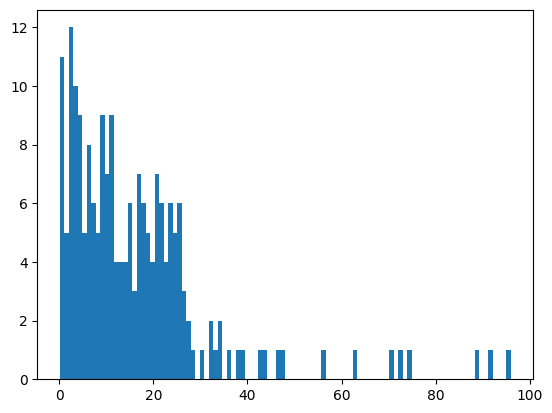

In [44]:
plt.hist(diff_np, bins=100)

In [66]:
#run inference on test images
test_images = []
# Replace "path/to/images" with the actual path to the directory containing your images
for image_file in os.listdir("val/"):
    # Read the image file
    image = cv2.imread(os.path.join("val/", image_file))
    # # Resize the image to a uniform size
    image = cv2.resize(image, (224, 224))
    # # Convert the image to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # # Normalize the pixel values
    image = image / 255.0
    # Add the image to the list of images
    test_images.append(image)

1/1 [==============================] - 0s 31ms/step
Predicted:  [[22.170988]]


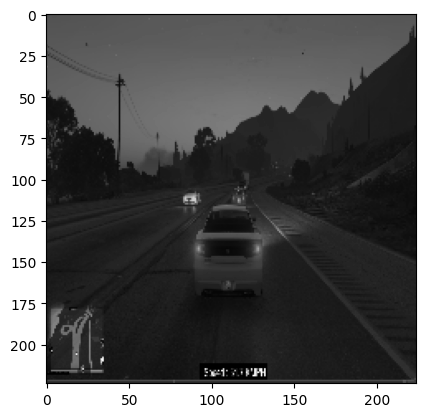

1/1 [==============================] - 0s 28ms/step
Predicted:  [[25.564062]]


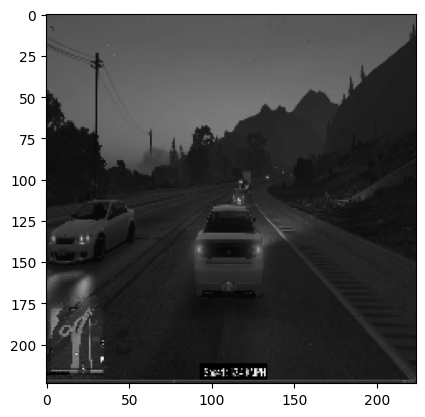

1/1 [==============================] - 0s 28ms/step
Predicted:  [[23.894125]]


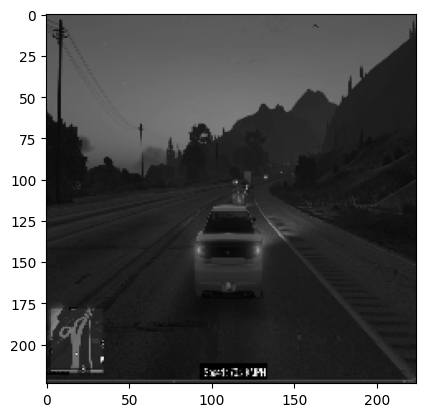

1/1 [==============================] - 0s 28ms/step
Predicted:  [[29.519156]]


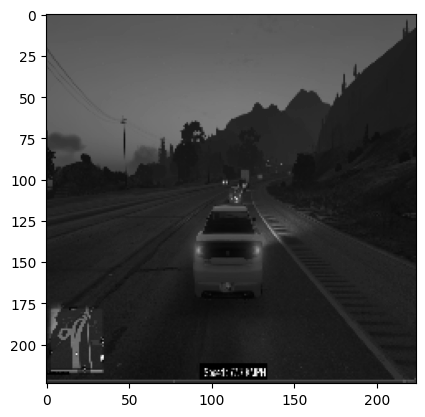

1/1 [==============================] - 0s 27ms/step
Predicted:  [[28.501823]]


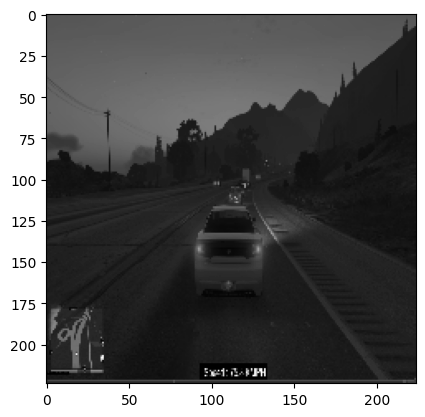

In [84]:
import random
i = random.randint(0, len(test_images))

#show 5 consecutive images and their predictions
for j in range(5):
    print("Predicted: ", model.predict(test_images[i+j].reshape(1, 224, 224, 1)))
    plt.imshow(test_images[i+j], cmap='gray')
    plt.show()
